In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

import librosa

## Loading data

In [3]:
df = pd.read_json("new_features.json")
print(df.head())
print('\n dataframe shape:', df.shape)

        filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  pop.00027.wav   pop      0.299881      0.379244      0.470128   
1  pop.00033.wav   pop      0.544635      0.350781      0.388006   
2  pop.00032.wav   pop      0.443481      0.493255      0.373764   
3  pop.00026.wav   pop      0.463715      0.287497      0.316427   
4  pop.00030.wav   pop      0.401023      0.533435      0.290821   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.325283      0.342244      0.313968      0.442569      0.401032  ...   
1      0.337791      0.391167      0.430018      0.447838      0.531868  ...   
2      0.478039      0.476955      0.344388      0.389499      0.403201  ...   
3      0.245788      0.323225      0.266904      0.250274      0.541873  ...   
4      0.372626      0.260384      0.372584      0.256875      0.289864  ...   

     mfcc31    mfcc32    mfcc33    mfcc34    mfcc35    mfcc36    mfcc37  \
0  1.255251 -2.895950 -4.593103 -2.

In [53]:
noisy_df = pd.read_json("noisy_data.json")
noisy_df = pd.DataFrame(noisy_df)
print(noisy_df.head())
print('\n dataframe shape:', noisy_df.shape)

              filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  noisy_pop.00027.wav   pop      0.301405      0.380578      0.470909   
1  noisy_pop.00033.wav   pop      0.553039      0.361031      0.399264   
2  noisy_pop.00032.wav   pop      0.446532      0.503312      0.385121   
3  noisy_pop.00026.wav   pop      0.464116      0.288315      0.317472   
4  noisy_pop.00030.wav   pop      0.404327      0.532846      0.291451   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.326243      0.343126      0.315052      0.443509      0.401989  ...   
1      0.350988      0.402286      0.429576      0.447139      0.538224  ...   
2      0.477731      0.491484      0.356068      0.392136      0.405469  ...   
3      0.246834      0.323764      0.267547      0.250985      0.542027  ...   
4      0.373560      0.261424      0.373583      0.257144      0.292758  ...   

     mfcc31    mfcc32    mfcc33    mfcc34    mfcc35    mfcc36    mfcc37  \

In [54]:
time_shifted_df = pd.read_json("time_shifted_data.json")
time_shifted_df = pd.DataFrame(time_shifted_df)
print(time_shifted_df.head())
print('\n dataframe shape:', time_shifted_df.shape)

                     filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  time_shifted_pop.00027.wav   pop      0.306029      0.370010      0.475292   
1  time_shifted_pop.00033.wav   pop      0.547450      0.353257      0.388323   
2  time_shifted_pop.00032.wav   pop      0.443698      0.492472      0.373667   
3  time_shifted_pop.00026.wav   pop      0.467676      0.293827      0.315371   
4  time_shifted_pop.00030.wav   pop      0.401961      0.532432      0.290782   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.336059      0.343012      0.309952      0.433466      0.412050  ...   
1      0.340149      0.389167      0.430209      0.444518      0.533291  ...   
2      0.479971      0.475356      0.342859      0.389272      0.404013  ...   
3      0.248235      0.321149      0.271514      0.246058      0.538563  ...   
4      0.371661      0.260640      0.372821      0.256044      0.291768  ...   

     mfcc31    mfcc32    mfcc33 

In [55]:
pitch_shifted_df = pd.read_json("pitch_shifted_data.json")
pitch_shifted_df = pd.DataFrame(pitch_shifted_df)
print(pitch_shifted_df.head())
print('\n dataframe shape:', pitch_shifted_df.shape)

                      filename label  chroma_stft1  chroma_stft2  \
0  pitch_shifted_pop.00027.wav   pop      0.366113      0.479945   
1  pitch_shifted_pop.00033.wav   pop      0.424664      0.449109   
2  pitch_shifted_pop.00032.wav   pop      0.367452      0.411067   
3  pitch_shifted_pop.00026.wav   pop      0.276579      0.290280   
4  pitch_shifted_pop.00030.wav   pop      0.402695      0.285293   

   chroma_stft3  chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  \
0      0.421510      0.386257      0.470269      0.406797      0.454519   
1      0.541994      0.431946      0.437220      0.368296      0.453353   
2      0.434475      0.496180      0.398096      0.418036      0.494318   
3      0.556706      0.414837      0.360338      0.259230      0.362898   
4      0.316991      0.489363      0.344343      0.438938      0.296533   

   chroma_stft8  ...    mfcc31    mfcc32    mfcc33    mfcc34    mfcc35  \
0      0.339842  ... -0.698094  7.363560  0.062337  0.067894 -0.67

In [56]:
df1 = df.copy()

In [57]:
df1.pop('filename')

0       pop.00027.wav
1       pop.00033.wav
2       pop.00032.wav
3       pop.00026.wav
4       pop.00030.wav
            ...      
995    jazz.00018.wav
996    jazz.00032.wav
997    jazz.00026.wav
998    jazz.00027.wav
999    jazz.00033.wav
Name: filename, Length: 1000, dtype: object

## Modelling

### Choosing the outcome and predictor variables

In [58]:
y = df1.pop('label')

In [59]:
X = df1

### Creating train_test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
noisy_df.drop(noisy_df.index[X_test.index], inplace=True)

In [62]:
time_shifted_df.drop(time_shifted_df.index[X_test.index], inplace=True)

In [63]:
pitch_shifted_df.drop(pitch_shifted_df.index[X_test.index], inplace=True)

In [64]:
X_train = X_train.append(noisy_df.iloc[:,2:])

In [65]:
X_train = X_train.append(time_shifted_df.iloc[:,2:])

In [66]:
X_train = X_train.append(pitch_shifted_df.iloc[:,2:])

In [67]:
y_train = y_train.append(noisy_df.iloc[:,1])
y_train = y_train.append(time_shifted_df.iloc[:,1])
y_train = y_train.append(pitch_shifted_df.iloc[:,1])

In [68]:
convertor = LabelEncoder()
y_train = convertor.fit_transform(y_train)
y_test = convertor.transform(y_test)

### Rescaling the variables

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(X_train,dtype=float))
X_test = scaler.transform(np.array(X_test,dtype=float))
# X_train = scaler.fit_transform(np.array(X, dtype=float))

### Simple deep learning model

In [70]:
def trainModel(model, epochs, optimizer):
    batch_size =128
    model.compile(optimizer = optimizer,
                  loss = 'sparse_categorical_crossentropy',
                  metrics = 'accuracy'
                 )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                    batch_size=batch_size)

def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.legend(bbox_to_anchor=(1.3, 0.3))
    plt.show()

In [71]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape = (X_train.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               50176     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [237]:
model_history = trainModel(model=model, epochs=80, optimizer='adam')

Epoch 1/80
25/25 [==============================] - 1s 8ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 30.2721 - val_accuracy: 0.6900
Epoch 2/80
25/25 [==============================] - 0s 4ms/step - loss: 0.2353 - accuracy: 0.9984 - val_loss: 30.0189 - val_accuracy: 0.6850
Epoch 3/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 29.6481 - val_accuracy: 0.6850
Epoch 4/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9975 - val_loss: 31.8890 - val_accuracy: 0.6850
Epoch 5/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 32.4407 - val_accuracy: 0.6900
Epoch 6/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 33.7890 - val_accuracy: 0.6900
Epoch 7/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9984 - val_loss: 33.9907 - val_accuracy: 0.6850
Epoch 8/80
25

Epoch 59/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 0.9991 - val_loss: 34.0410 - val_accuracy: 0.7200
Epoch 60/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9991 - val_loss: 34.1420 - val_accuracy: 0.7200
Epoch 61/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9987 - val_loss: 34.1723 - val_accuracy: 0.7250
Epoch 62/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 34.1765 - val_accuracy: 0.7250
Epoch 63/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9987 - val_loss: 33.1045 - val_accuracy: 0.7200
Epoch 64/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9991 - val_loss: 32.8585 - val_accuracy: 0.7200
Epoch 65/80
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 32.8206 - val_accuracy: 0.7200
Epoch 

Validation Accuracy 0.7300000190734863


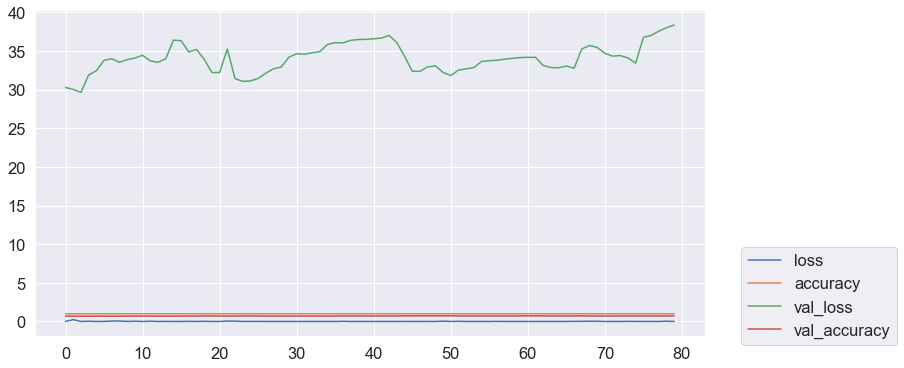

In [238]:
plotValidate(model_history)

In [239]:
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=40)
print("\nThe Training Loss is:", train_loss)
print("The Best Training Accuracy is:", train_acc*100)

80/80 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9991

The Training Loss is: 0.0012998374877497554
The Best Training Accuracy is: 99.90624785423279


In [240]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=20)
print("\nThe Test Loss is:", test_loss)
print("The Best Test Accuracy is:", test_acc*100)

10/10 [==============================] - 0s 1ms/step - loss: 38.3619 - accuracy: 0.7200

The Test Loss is: 38.36188507080078
The Best Test Accuracy is: 72.00000286102295


## Testing the model on new data

In [144]:
def feature_extraction(signal):
    
    data = {
            "chroma_stft1": [],
            "chroma_stft2": [],
            "chroma_stft3": [],
            "chroma_stft4": [],
            "chroma_stft5": [],
            "chroma_stft6": [],
            "chroma_stft7": [],
            "chroma_stft8": [],
            "chroma_stft9": [],
            "chroma_stft10": [],
            "chroma_stft11": [],
            "chroma_stft12": [],
            "chroma_cqt1": [],
            "chroma_cqt2": [],
            "chroma_cqt3": [],
            "chroma_cqt4": [],
            "chroma_cqt5": [],
            "chroma_cqt6": [],
            "chroma_cqt7": [],
            "chroma_cqt8": [],
            "chroma_cqt9": [],
            "chroma_cqt10": [],
            "chroma_cqt11": [],
            "chroma_cqt12": [],
            "chroma_cens1": [],
            "chroma_cens2": [],
            "chroma_cens3": [],
            "chroma_cens4": [],
            "chroma_cens5": [],
            "chroma_cens6": [],
            "chroma_cens7": [],
            "chroma_cens8": [],
            "chroma_cens9": [],
            "chroma_cens10": [],
            "chroma_cens11": [],
            "chroma_cens12": [],
            "rms": [],
            "spectral_centroid": [], 
            "spectral_bandwidth": [], 
            "spectral_flatness": [],
            "spectral_rolloff": [],
            "spectral_contrast1": [],
            "spectral_contrast2": [],
            "spectral_contrast3": [],
            "spectral_contrast4": [],
            "spectral_contrast5": [],
            "spectral_contrast6": [],
            "spectral_contrast7": [],
            "poly_features1": [],
            "poly_features2": [],
            "tonnetz1": [],
            "tonnetz2": [],
            "tonnetz3": [],
            "tonnetz4": [],
            "tonnetz5": [],
            "tonnetz6": [],
            "zero_crossing_rate": [],
            "mfcc1": [],
            "mfcc2": [],
            "mfcc3": [],
            "mfcc4": [],
            "mfcc5": [],
            "mfcc6": [],
            "mfcc7": [],
            "mfcc8": [],
            "mfcc9": [],
            "mfcc10": [],
            "mfcc11": [],
            "mfcc12": [],
            "mfcc13": [],
            "mfcc14": [],
            "mfcc15": [],
            "mfcc16": [],
            "mfcc17": [],
            "mfcc18": [],
            "mfcc19": [],
            "mfcc20": [],
            "mfcc21": [],
            "mfcc22": [],
            "mfcc23": [],
            "mfcc24": [],
            "mfcc25": [],
            "mfcc26": [],
            "mfcc27": [],
            "mfcc28": [],
            "mfcc29": [],
            "mfcc30": [],
            "mfcc31": [],
            "mfcc32": [],
            "mfcc33": [],
            "mfcc34": [],
            "mfcc35": [],
            "mfcc36": [],
            "mfcc37": [],
            "mfcc38": [],
            "mfcc39": [],
            "mfcc40": [],
            }



    # extract spectral features
    chroma_stft1 = librosa.feature.chroma_stft(signal)[0].mean()
    chroma_stft1 = chroma_stft1.T
    chroma_stft2 = librosa.feature.chroma_stft(signal)[1].mean()
    chroma_stft2 = chroma_stft2.T
    chroma_stft3 = librosa.feature.chroma_stft(signal)[2].mean()
    chroma_stft3 = chroma_stft3.T
    chroma_stft4 = librosa.feature.chroma_stft(signal)[3].mean()
    chroma_stft4 = chroma_stft4.T
    chroma_stft5 = librosa.feature.chroma_stft(signal)[4].mean()
    chroma_stft5 = chroma_stft5.T
    chroma_stft6 = librosa.feature.chroma_stft(signal)[5].mean()
    chroma_stft6 = chroma_stft6.T
    chroma_stft7 = librosa.feature.chroma_stft(signal)[6].mean()
    chroma_stft7 = chroma_stft7.T
    chroma_stft8 = librosa.feature.chroma_stft(signal)[7].mean()
    chroma_stft8 = chroma_stft8.T
    chroma_stft9 = librosa.feature.chroma_stft(signal)[8].mean()
    chroma_stft9 = chroma_stft9.T
    chroma_stft10 = librosa.feature.chroma_stft(signal)[9].mean()
    chroma_stft10 = chroma_stft10.T
    chroma_stft11 = librosa.feature.chroma_stft(signal)[10].mean()
    chroma_stft11 = chroma_stft11.T
    chroma_stft12 = librosa.feature.chroma_stft(signal)[11].mean()
    chroma_stft12 = chroma_stft12.T

    chroma_cqt1 = librosa.feature.chroma_cqt(signal)[0].mean()
    chroma_cqt1 = chroma_cqt1.T
    chroma_cqt2 = librosa.feature.chroma_cqt(signal)[1].mean()
    chroma_cqt2 = chroma_cqt2.T
    chroma_cqt3 = librosa.feature.chroma_cqt(signal)[2].mean()
    chroma_cqt3 = chroma_cqt3.T
    chroma_cqt4 = librosa.feature.chroma_cqt(signal)[3].mean()
    chroma_cqt4 = chroma_cqt4.T
    chroma_cqt5 = librosa.feature.chroma_cqt(signal)[4].mean()
    chroma_cqt5 = chroma_cqt5.T
    chroma_cqt6 = librosa.feature.chroma_cqt(signal)[5].mean()
    chroma_cqt6 = chroma_cqt6.T
    chroma_cqt7 = librosa.feature.chroma_cqt(signal)[6].mean()
    chroma_cqt7 = chroma_cqt7.T
    chroma_cqt8 = librosa.feature.chroma_cqt(signal)[7].mean()
    chroma_cqt8 = chroma_cqt8.T
    chroma_cqt9 = librosa.feature.chroma_cqt(signal)[8].mean()
    chroma_cqt9 = chroma_cqt9.T
    chroma_cqt10 = librosa.feature.chroma_cqt(signal)[9].mean()
    chroma_cqt10 = chroma_cqt10.T
    chroma_cqt11 = librosa.feature.chroma_cqt(signal)[10].mean()
    chroma_cqt11 = chroma_cqt11.T
    chroma_cqt12 = librosa.feature.chroma_cqt(signal)[11].mean()
    chroma_cqt12 = chroma_cqt12.T

    chroma_cens1 = librosa.feature.chroma_cens(signal)[0].mean()
    chroma_cens1 = chroma_cens1.T
    chroma_cens2 = librosa.feature.chroma_cens(signal)[1].mean()
    chroma_cens2 = chroma_cens2.T
    chroma_cens3 = librosa.feature.chroma_cens(signal)[2].mean()
    chroma_cens3 = chroma_cens3.T
    chroma_cens4 = librosa.feature.chroma_cens(signal)[3].mean()
    chroma_cens4 = chroma_cens4.T
    chroma_cens5 = librosa.feature.chroma_cens(signal)[4].mean()
    chroma_cens5 = chroma_cens5.T
    chroma_cens6 = librosa.feature.chroma_cens(signal)[5].mean()
    chroma_cens6 = chroma_cens6.T
    chroma_cens7 = librosa.feature.chroma_cens(signal)[6].mean()
    chroma_cens7 = chroma_cens7.T
    chroma_cens8 = librosa.feature.chroma_cens(signal)[7].mean()
    chroma_cens8 = chroma_cens8.T
    chroma_cens9 = librosa.feature.chroma_cens(signal)[8].mean()
    chroma_cens9 = chroma_cens9.T
    chroma_cens10 = librosa.feature.chroma_cens(signal)[9].mean()
    chroma_cens10 = chroma_cens10.T
    chroma_cens11 = librosa.feature.chroma_cens(signal)[10].mean()
    chroma_cens11 = chroma_cens11.T
    chroma_cens12 = librosa.feature.chroma_cens(signal)[11].mean()
    chroma_cens12 = chroma_cens12.T

    rms = librosa.feature.rms(signal).mean()
    rms = rms.T

    spectral_centroid = librosa.feature.spectral_centroid(signal).mean()
    spectral_centroid = spectral_centroid.T

    spectral_bandwidth = librosa.feature.spectral_bandwidth(signal).mean()
    spectral_bandwidth = spectral_bandwidth.T

    spectral_flatness = librosa.feature.spectral_flatness(signal).mean()
    spectral_flatness = spectral_flatness.T

    spectral_rolloff = librosa.feature.spectral_rolloff(signal).mean()
    spectral_rolloff = spectral_rolloff.T

    spectral_contrast1 = librosa.feature.spectral_contrast(signal)[0].mean()
    spectral_contrast1 = spectral_contrast1.T
    spectral_contrast2 = librosa.feature.spectral_contrast(signal)[1].mean()
    spectral_contrast2 = spectral_contrast2.T
    spectral_contrast3 = librosa.feature.spectral_contrast(signal)[2].mean()
    spectral_contrast3 = spectral_contrast3.T
    spectral_contrast4 = librosa.feature.spectral_contrast(signal)[3].mean()
    spectral_contrast4 = spectral_contrast4.T
    spectral_contrast5 = librosa.feature.spectral_contrast(signal)[4].mean()
    spectral_contrast5 = spectral_contrast5.T
    spectral_contrast6 = librosa.feature.spectral_contrast(signal)[5].mean()
    spectral_contrast6 = spectral_contrast6.T
    spectral_contrast7 = librosa.feature.spectral_contrast(signal)[6].mean()
    spectral_contrast7 = spectral_contrast7.T

    poly_features1 = librosa.feature.poly_features(signal)[0].mean()
    poly_features1 = poly_features1.T
    poly_features2 = librosa.feature.poly_features(signal)[1].mean()
    poly_features2 = poly_features2.T

    tonnetz1 = librosa.feature.tonnetz(signal)[0].mean()
    tonnetz1 = tonnetz1.T
    tonnetz2 = librosa.feature.tonnetz(signal)[1].mean()
    tonnetz2 = tonnetz2.T
    tonnetz3 = librosa.feature.tonnetz(signal)[2].mean()
    tonnetz3 = tonnetz3.T
    tonnetz4 = librosa.feature.tonnetz(signal)[3].mean()
    tonnetz4 = tonnetz4.T
    tonnetz5 = librosa.feature.tonnetz(signal)[4].mean()
    tonnetz5 = tonnetz5.T
    tonnetz6 = librosa.feature.tonnetz(signal)[5].mean()
    tonnetz6 = tonnetz6.T

    zero_crossing_rate = librosa.feature.zero_crossing_rate(signal).mean()
    zero_crossing_rate = zero_crossing_rate.T

    mfcc1 = librosa.feature.mfcc(signal, n_mfcc=40)[0].mean()
    mfcc1 = mfcc1.T
    mfcc2 = librosa.feature.mfcc(signal, n_mfcc=40)[1].mean()
    mfcc2 = mfcc2.T
    mfcc3 = librosa.feature.mfcc(signal, n_mfcc=40)[2].mean()
    mfcc3 = mfcc3.T
    mfcc4 = librosa.feature.mfcc(signal, n_mfcc=40)[3].mean()
    mfcc4 = mfcc4.T
    mfcc5 = librosa.feature.mfcc(signal, n_mfcc=40)[4].mean()
    mfcc5 = mfcc5.T
    mfcc6 = librosa.feature.mfcc(signal, n_mfcc=40)[5].mean()
    mfcc6 = mfcc6.T
    mfcc7 = librosa.feature.mfcc(signal, n_mfcc=40)[6].mean()
    mfcc7 = mfcc7.T
    mfcc8 = librosa.feature.mfcc(signal, n_mfcc=40)[7].mean()
    mfcc8 = mfcc8.T
    mfcc9 = librosa.feature.mfcc(signal, n_mfcc=40)[8].mean()
    mfcc9 = mfcc9.T
    mfcc10 = librosa.feature.mfcc(signal, n_mfcc=40)[9].mean()
    mfcc10 = mfcc10.T
    mfcc11 = librosa.feature.mfcc(signal, n_mfcc=40)[10].mean()
    mfcc11 = mfcc11.T
    mfcc12 = librosa.feature.mfcc(signal, n_mfcc=40)[11].mean()
    mfcc12 = mfcc12.T
    mfcc13 = librosa.feature.mfcc(signal, n_mfcc=40)[12].mean()
    mfcc13 = mfcc13.T
    mfcc14 = librosa.feature.mfcc(signal, n_mfcc=40)[13].mean()
    mfcc14 = mfcc14.T
    mfcc15 = librosa.feature.mfcc(signal, n_mfcc=40)[14].mean()
    mfcc15 = mfcc15.T
    mfcc16 = librosa.feature.mfcc(signal, n_mfcc=40)[15].mean()
    mfcc16 = mfcc16.T
    mfcc17 = librosa.feature.mfcc(signal, n_mfcc=40)[16].mean()
    mfcc17 = mfcc17.T
    mfcc18 = librosa.feature.mfcc(signal, n_mfcc=40)[17].mean()
    mfcc18 = mfcc18.T
    mfcc19 = librosa.feature.mfcc(signal, n_mfcc=40)[18].mean()
    mfcc19 = mfcc19.T
    mfcc20 = librosa.feature.mfcc(signal, n_mfcc=40)[19].mean()
    mfcc20 = mfcc20.T
    mfcc21 = librosa.feature.mfcc(signal, n_mfcc=40)[20].mean()
    mfcc21 = mfcc21.T
    mfcc22 = librosa.feature.mfcc(signal, n_mfcc=40)[21].mean()
    mfcc22 = mfcc22.T
    mfcc23 = librosa.feature.mfcc(signal, n_mfcc=40)[22].mean()
    mfcc23 = mfcc23.T
    mfcc24 = librosa.feature.mfcc(signal, n_mfcc=40)[23].mean()
    mfcc24 = mfcc24.T
    mfcc25 = librosa.feature.mfcc(signal, n_mfcc=40)[24].mean()
    mfcc25 = mfcc25.T
    mfcc26 = librosa.feature.mfcc(signal, n_mfcc=40)[25].mean()
    mfcc26 = mfcc26.T
    mfcc27 = librosa.feature.mfcc(signal, n_mfcc=40)[26].mean()
    mfcc27 = mfcc27.T
    mfcc28 = librosa.feature.mfcc(signal, n_mfcc=40)[27].mean()
    mfcc28 = mfcc28.T
    mfcc29 = librosa.feature.mfcc(signal, n_mfcc=40)[28].mean()
    mfcc29 = mfcc29.T
    mfcc30 = librosa.feature.mfcc(signal, n_mfcc=40)[29].mean()
    mfcc30 = mfcc30.T
    mfcc31 = librosa.feature.mfcc(signal, n_mfcc=40)[30].mean()
    mfcc31 = mfcc31.T
    mfcc32 = librosa.feature.mfcc(signal, n_mfcc=40)[31].mean()
    mfcc32 = mfcc32.T
    mfcc33 = librosa.feature.mfcc(signal, n_mfcc=40)[32].mean()
    mfcc33 = mfcc33.T
    mfcc34 = librosa.feature.mfcc(signal, n_mfcc=40)[33].mean()
    mfcc34 = mfcc34.T
    mfcc35 = librosa.feature.mfcc(signal, n_mfcc=40)[34].mean()
    mfcc35 = mfcc35.T
    mfcc36 = librosa.feature.mfcc(signal, n_mfcc=40)[35].mean()
    mfcc36 = mfcc36.T
    mfcc37 = librosa.feature.mfcc(signal, n_mfcc=40)[36].mean()
    mfcc37 = mfcc37.T
    mfcc38 = librosa.feature.mfcc(signal, n_mfcc=40)[37].mean()
    mfcc38 = mfcc38.T
    mfcc39 = librosa.feature.mfcc(signal, n_mfcc=40)[38].mean()
    mfcc39 = mfcc39.T
    mfcc40 = librosa.feature.mfcc(signal, n_mfcc=40)[39].mean()
    mfcc40 = mfcc40.T   


    data["chroma_stft1"].append(chroma_stft1.tolist())
    data["chroma_stft2"].append(chroma_stft2.tolist())
    data["chroma_stft3"].append(chroma_stft3.tolist())
    data["chroma_stft4"].append(chroma_stft4.tolist())
    data["chroma_stft5"].append(chroma_stft5.tolist())
    data["chroma_stft6"].append(chroma_stft6.tolist())
    data["chroma_stft7"].append(chroma_stft7.tolist())
    data["chroma_stft8"].append(chroma_stft8.tolist())
    data["chroma_stft9"].append(chroma_stft9.tolist())
    data["chroma_stft10"].append(chroma_stft10.tolist())
    data["chroma_stft11"].append(chroma_stft11.tolist())
    data["chroma_stft12"].append(chroma_stft12.tolist())

    data["chroma_cqt1"].append(chroma_cqt1.tolist())
    data["chroma_cqt2"].append(chroma_cqt2.tolist())
    data["chroma_cqt3"].append(chroma_cqt3.tolist())
    data["chroma_cqt4"].append(chroma_cqt4.tolist())
    data["chroma_cqt5"].append(chroma_cqt5.tolist())
    data["chroma_cqt6"].append(chroma_cqt6.tolist())
    data["chroma_cqt7"].append(chroma_cqt7.tolist())
    data["chroma_cqt8"].append(chroma_cqt8.tolist())
    data["chroma_cqt9"].append(chroma_cqt9.tolist())
    data["chroma_cqt10"].append(chroma_cqt10.tolist())
    data["chroma_cqt11"].append(chroma_cqt11.tolist())
    data["chroma_cqt12"].append(chroma_cqt12.tolist())

    data["chroma_cens1"].append(chroma_cens1.tolist())
    data["chroma_cens2"].append(chroma_cens2.tolist())
    data["chroma_cens3"].append(chroma_cens3.tolist())
    data["chroma_cens4"].append(chroma_cens4.tolist())
    data["chroma_cens5"].append(chroma_cens5.tolist())
    data["chroma_cens6"].append(chroma_cens6.tolist())
    data["chroma_cens7"].append(chroma_cens7.tolist())
    data["chroma_cens8"].append(chroma_cens8.tolist())
    data["chroma_cens9"].append(chroma_cens9.tolist())
    data["chroma_cens10"].append(chroma_cens10.tolist())
    data["chroma_cens11"].append(chroma_cens11.tolist())
    data["chroma_cens12"].append(chroma_cens12.tolist())

    data["rms"].append(rms.tolist())

    data["spectral_centroid"].append(spectral_centroid.tolist())

    data["spectral_bandwidth"].append(spectral_bandwidth.tolist())

    data["spectral_flatness"].append(spectral_flatness.tolist())

    data["spectral_rolloff"].append(spectral_rolloff.tolist())

    data["spectral_contrast1"].append(spectral_contrast1.tolist())
    data["spectral_contrast2"].append(spectral_contrast2.tolist())
    data["spectral_contrast3"].append(spectral_contrast3.tolist())
    data["spectral_contrast4"].append(spectral_contrast4.tolist())
    data["spectral_contrast5"].append(spectral_contrast5.tolist())
    data["spectral_contrast6"].append(spectral_contrast6.tolist())
    data["spectral_contrast7"].append(spectral_contrast7.tolist())

    data["poly_features1"].append(poly_features1.tolist())
    data["poly_features2"].append(poly_features2.tolist())

    data["tonnetz1"].append(tonnetz1.tolist())
    data["tonnetz2"].append(tonnetz2.tolist())
    data["tonnetz3"].append(tonnetz3.tolist())
    data["tonnetz4"].append(tonnetz4.tolist())
    data["tonnetz5"].append(tonnetz5.tolist())
    data["tonnetz6"].append(tonnetz6.tolist())

    data["zero_crossing_rate"].append(zero_crossing_rate.tolist())

    data["mfcc1"].append(mfcc1.tolist())
    data["mfcc2"].append(mfcc2.tolist())
    data["mfcc3"].append(mfcc3.tolist())
    data["mfcc4"].append(mfcc4.tolist())
    data["mfcc5"].append(mfcc5.tolist())
    data["mfcc6"].append(mfcc6.tolist())
    data["mfcc7"].append(mfcc7.tolist())
    data["mfcc8"].append(mfcc8.tolist())
    data["mfcc9"].append(mfcc9.tolist())
    data["mfcc10"].append(mfcc10.tolist())
    data["mfcc11"].append(mfcc11.tolist())
    data["mfcc12"].append(mfcc12.tolist())
    data["mfcc13"].append(mfcc13.tolist())
    data["mfcc14"].append(mfcc14.tolist())
    data["mfcc15"].append(mfcc15.tolist())
    data["mfcc16"].append(mfcc16.tolist())
    data["mfcc17"].append(mfcc17.tolist())
    data["mfcc18"].append(mfcc18.tolist())
    data["mfcc19"].append(mfcc19.tolist())
    data["mfcc20"].append(mfcc20.tolist())
    data["mfcc21"].append(mfcc21.tolist())
    data["mfcc22"].append(mfcc22.tolist())
    data["mfcc23"].append(mfcc23.tolist())
    data["mfcc24"].append(mfcc24.tolist())
    data["mfcc25"].append(mfcc25.tolist())
    data["mfcc26"].append(mfcc26.tolist())
    data["mfcc27"].append(mfcc27.tolist())
    data["mfcc28"].append(mfcc28.tolist())
    data["mfcc29"].append(mfcc29.tolist())
    data["mfcc30"].append(mfcc30.tolist())
    data["mfcc31"].append(mfcc31.tolist())
    data["mfcc32"].append(mfcc32.tolist())
    data["mfcc33"].append(mfcc33.tolist())
    data["mfcc34"].append(mfcc34.tolist())
    data["mfcc35"].append(mfcc35.tolist())
    data["mfcc36"].append(mfcc36.tolist())
    data["mfcc37"].append(mfcc37.tolist())
    data["mfcc38"].append(mfcc38.tolist())
    data["mfcc39"].append(mfcc39.tolist())
    data["mfcc40"].append(mfcc40.tolist())

    return data

In [450]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']

In [467]:
def guess_genre(song_file):
    signal, sr = librosa.load(song_file)
    df_song = feature_extraction(signal)
    df_song = pd.DataFrame(df_song)
    X_song = df_song
    X_song = pd.DataFrame(scaler.transform(df_song), columns=X_song.columns)
    results_song = pd.DataFrame(model.predict(X_song), columns=labels).T.reset_index()
    results_song.columns = ['genre', 'contribution']
    results_song = results_song.sort_values(by='contribution', ascending=False)

    return results_song

### Blues

In [468]:
guess_genre('new_data/Muddy Waters - I Feel Like Going Home.wav')

,genre,contribution
8,reggae,1.000000e+00
4,hiphop,8.977761e-10
0,blues,2.233514e-10
5,jazz,2.162193e-13
3,disco,1.623048e-16
2,country,1.571522e-17
9,rock,7.751776e-19
1,classical,2.977418e-23
7,pop,2.309061e-31
6,metal,6.308716e-34


In [469]:
guess_genre('new_data/B.B.King - The Thrill Is Gone ft. Tracy Chapman.wav')

,genre,contribution
8,reggae,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
9,rock,0.0


We can see that the model failed at predicting the label of new blues songs.

### Jazz

In [470]:
guess_genre('new_data/Miles Davis-So What.wav')

,genre,contribution
5,jazz,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


In [471]:
guess_genre('new_data/Louis Armstrong-You Will Never Walk Alone.wav')

,genre,contribution
1,classical,1.0
0,blues,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


The model successfully guessed the genre of the first jazz song but didn't manage to find the correct label for the second song.

### Classical

In [472]:
guess_genre('new_data/Symphony_No.6(1st_movement).wav')

,genre,contribution
1,classical,1.0
0,blues,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


In [473]:
guess_genre('new_data/Chopin - Spring Waltz.wav')

,genre,contribution
1,classical,1.0
0,blues,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


The deep learning model is doing well at predicting the genre of the classical songs.

### Country

In [474]:
guess_genre('new_data/Alan Jackson-Remember When.wav')

,genre,contribution
2,country,1.0
0,blues,0.0
1,classical,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


In [475]:
guess_genre('new_data/Ashley Monroe-I Dont Want To.wav')

,genre,contribution
5,jazz,1.000000e+00
3,disco,4.867100e-12
8,reggae,1.048232e-12
1,classical,1.716789e-13
9,rock,1.312722e-14
7,pop,1.937702e-15
4,hiphop,7.495742e-16
2,country,4.691268e-17
0,blues,9.315376e-23
6,metal,8.610959e-27


We can notice that the model managed to predict the genre of the first country song but not of the second one.

### Rock

In [476]:
guess_genre('new_data/Queen-Bohemian Rhapsody.wav')

,genre,contribution
7,pop,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
8,reggae,0.0
9,rock,0.0


In [477]:
guess_genre('new_data/Led Zeppelin-Stairway To Heaven.wav')

,genre,contribution
1,classical,1.0
0,blues,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


As observed, the model is struggling at predicting the label of new rock songs.

### Metal

In [478]:
guess_genre('new_data/MASTODON-Blood and Thunder.wav')

,genre,contribution
6,metal,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


In [479]:
guess_genre('new_data/DragonForce-Through the Fire and Flames.wav')

,genre,contribution
3,disco,1.000000e+00
6,metal,1.685952e-09
4,hiphop,4.000496e-13
9,rock,8.305924e-17
8,reggae,8.431788e-20
7,pop,4.433817e-24
2,country,9.974581e-25
0,blues,2.733782e-26
5,jazz,1.575493e-35
1,classical,0.000000e+00


The label of 1/2 metal songs was guessed by our model. 

### Hip-Hop

In [480]:
guess_genre('new_data/Eminem-The Way I Am.wav')

,genre,contribution
4,hiphop,1.000000e+00
8,reggae,1.304193e-34
0,blues,0.000000e+00
1,classical,0.000000e+00
2,country,0.000000e+00
3,disco,0.000000e+00
5,jazz,0.000000e+00
6,metal,0.000000e+00
7,pop,0.000000e+00
9,rock,0.000000e+00


In [481]:
guess_genre('new_data/JAY-Z-Run This Town.wav')

,genre,contribution
7,pop,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
8,reggae,0.0
9,rock,0.0


The deep learning model is doing better at guessing the genre of hip-hop songs than the LR and SVC models as it guessed the label of 1/2 song.

### Pop

In [466]:
guess_genre('new_data/Madonna_Sorry.wav')

,genre,contribution
7,pop,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
3,disco,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
8,reggae,0.0
9,rock,0.0


In [482]:
guess_genre('new_data/Michael Jackson - Thriller.wav')

,genre,contribution
3,disco,1.000000e+00
7,pop,6.974625e-10
4,hiphop,1.777526e-22
0,blues,8.753142e-26
8,reggae,5.824664e-28
2,country,1.863682e-31
9,rock,6.005357e-38
1,classical,0.000000e+00
5,jazz,0.000000e+00
6,metal,0.000000e+00


Our model got interesting results for pop. It firstly guessed the genre of 'Sorry' by Madonna - which wasn't achieved by the SVC and LR models. On top of that, even though Michael Jackson is the King of Pop, a lot of his songs are also classified as disco. 'Thriller' is classified as pop by Google but as disco by Wikipedia. Our model guess was closer to the classification of Wikipedia but interestingly pop comes as the second genre with the higher contribution.

### Disco

In [483]:
guess_genre('new_data/Tavares-Heaven Must Be Missing An Angel.wav')

,genre,contribution
3,disco,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


In [484]:
guess_genre('new_data/Bee Gees-You Should Be Dancing.wav')

,genre,contribution
3,disco,1.0
0,blues,0.0
1,classical,0.0
2,country,0.0
4,hiphop,0.0
5,jazz,0.0
6,metal,0.0
7,pop,0.0
8,reggae,0.0
9,rock,0.0


The deep learning model managed to correctly predict the genre of the disco songs.

### Reggae

In [485]:
guess_genre('new_data/Bob Marley-One Love.wav')

,genre,contribution
8,reggae,1.000000e+00
4,hiphop,3.582394e-23
3,disco,3.525843e-24
5,jazz,2.767137e-25
2,country,6.184969e-35
0,blues,2.578947e-35
1,classical,0.000000e+00
6,metal,0.000000e+00
7,pop,0.000000e+00
9,rock,0.000000e+00


In [486]:
guess_genre('new_data/Toots and the Maytals-Pressure Drop.wav')

,genre,contribution
1,classical,1.000000e+00
5,jazz,1.953048e-31
0,blues,1.142287e-32
7,pop,1.361257e-34
2,country,0.000000e+00
3,disco,0.000000e+00
4,hiphop,0.000000e+00
6,metal,0.000000e+00
8,reggae,0.000000e+00
9,rock,0.000000e+00


The label of 1/2 reggae songs was guessed by our model.

The deep learning model could predict the genre of new disco and classical songs and got interesting results for new pop songs.